# Diamond Dataset

## Summary of the Dataset

No. of instances(rows) in dataset = **2_19_703**

cut refers to one of the 10 or so most common diamond cuts. This dataset has an additional one called the 'Cushion Modified'. Diamond Shapes
color Clear diamonds are graded D-Z. The higher letters more yellowish but are often better values since color is hard to determine once in a ring.
clarity refers the inclusions (i.e., internal flaws) in the diamonds seen though a jewelers loupe or microscope. Fewer and smaller are better.
carat_weight Refers to the mass of the diamond. It's loosely connected with dimension of a diamond but cut and cut_quality tends to play an equally large if not larger role.
cut_quality refers the GIA Cut Grading System which was developed in 2005 and is de facto standard.
lab is the grading lab. The big three are GIA, IGI and HRD. Each diamond gets a lab certificate that looks like this.
polish and symmetry are what you would expect.
eye-clean refers to the blemishes or inclusions can see with a the naked eye. There are 10 grades.
culet_size is the size of the circle you'd see if you looked straight down. None is ideal because it affects the amount of light that gets reflected.
culet_condition indicates if the culet has any chipping, which is why some diamonds don't close to a point but rather a very small flat spot.
fancy_color_ columns have to do with colored diamonds. Formerly, extremely rare but now common, popular, and almost always lab grown.
fluor columns refer to the effect of long wave UV light. According to GIA 25-35% have it; for ~10% of those it's noticeable to an expert.
depth_percentandtable_percent are the relative measurements of the flat part of the top and the depth. This varies somewhat by cut.
meas_length, meas_width, meas_depth are the absolute measurements of stone.
girdle min/max are where the id of a stone is engraved they also are where the meets the setting and play a role in reflection. There are 9 values ranging from extremely thin to extremely thick
fancy columns refer to colored diamonds. They can be natural like the extremely rare blue diamonds, or lab grown. The columns refer to the colors, secondary colors and their intensity.
total_sales_price is priced in dollars.

## EDA

This is the database of 219703 graded diamonds with 25 columns of data.

In [ ]:
!mkdir data

In [ ]:
# import os
import pandas as pd
# Setting pandas options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 70)
pd.set_option('display.max_rows', 50)
pd.set_option('display.min_rows', 20)
pd.set_option('display.precision', 3)
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# pd.get_option("display.max_rows")
# pd.get_option("display.min_rows")
# pd.reset_option("display.max_colwidth")
# pd.get_option('display.max_colwidth')

In [ ]:
df = pd.read_csv('data/diamonds.csv')
#making a copy of the dataframe
ddf = df.copy()

In [ ]:
ddf.head()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.0900,Excellent,IGI,Very Good,Very Good,unknown,N,unknown,62.7000,59.0000,2.8500,2.8700,1.7900,M,M,unknown,None,unknown,unknown,unknown,unknown,200.0000
1,Round,E,VVS2,0.0900,Very Good,IGI,Very Good,Very Good,unknown,N,unknown,61.9000,59.0000,2.8400,2.8900,1.7800,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200.0000
2,Round,E,VVS2,0.0900,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,61.1000,59.0000,2.8800,2.9000,1.7700,TN,M,unknown,None,unknown,unknown,unknown,unknown,200.0000
3,Round,E,VVS2,0.0900,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,62.0000,59.0000,2.8600,2.8800,1.7800,M,STK,unknown,None,unknown,unknown,unknown,unknown,200.0000
4,Round,E,VVS2,0.0900,Very Good,IGI,Very Good,Excellent,unknown,N,unknown,64.9000,58.5000,2.7900,2.8300,1.8200,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200.0000


In [ ]:
# dropping the first serial column
ddf.drop(ddf.columns[0], axis=1, inplace = True)

In [ ]:
ddf.sample(10)

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
15964,Round,G,SI2,0.30,Very Good,GIA,Very Good,Very Good,unknown,N,unknown,64.4,59.0,4.14,4.20,2.69,unknown,unknown,unknown,None,unknown,unknown,unknown,unknown,706.0
24271,Round,G,SI2,0.30,Excellent,GIA,Very Good,Very Good,Yes,N,unknown,61.4,57.0,4.28,4.32,2.64,M,STK,unknown,None,unknown,unknown,unknown,unknown,750.0
67165,Round,I,VVS1,0.30,Excellent,GIA,Very Good,Excellent,Yes,N,unknown,61.4,59.0,4.32,4.33,2.65,M,M,unknown,None,unknown,unknown,unknown,unknown,1044.0
25551,Round,F,SI2,0.30,Excellent,GIA,Excellent,Excellent,unknown,unknown,unknown,60.1,60.0,4.32,4.34,2.60,unknown,unknown,unknown,None,unknown,unknown,unknown,unknown,776.0
55418,Round,I,IF,0.30,Very Good,GIA,Very Good,Excellent,unknown,N,unknown,60.2,64.0,4.29,4.33,2.60,STK,TK,Blue,Medium,unknown,unknown,unknown,unknown,966.0
63885,Round,I,VVS2,0.37,Excellent,GIA,Very Good,Excellent,unknown,N,unknown,61.2,58.0,4.62,4.64,2.83,TN,M,unknown,None,unknown,unknown,unknown,unknown,1012.0
22142,Round,E,SI2,0.30,Excellent,GIA,Very Good,Excellent,unknown,N,unknown,61.2,61.0,4.26,4.30,2.62,unknown,unknown,unknown,None,unknown,unknown,unknown,unknown,740.0
83834,Round,G,SI1,0.40,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,61.7,56.0,4.73,4.76,2.93,unknown,unknown,unknown,None,unknown,unknown,unknown,unknown,1232.0
16776,Round,E,SI2,0.30,Excellent,GIA,Very Good,Excellent,unknown,N,unknown,60.4,60.0,4.31,4.34,2.61,TN,STK,unknown,None,unknown,unknown,unknown,unknown,714.0
45264,Pear,D,VS2,0.30,unknown,GIA,Very Good,Excellent,Yes,N,unknown,62.5,56.0,5.79,3.69,2.31,STK,XTK,unknown,None,unknown,unknown,unknown,unknown,912.0


In [ ]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85375 entries, 0 to 85374
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cut                          85375 non-null  object 
 1   color                        85375 non-null  object 
 2   clarity                      85375 non-null  object 
 3   carat_weight                 85375 non-null  float64
 4   cut_quality                  85375 non-null  object 
 5   lab                          85375 non-null  object 
 6   symmetry                     85375 non-null  object 
 7   polish                       85375 non-null  object 
 8   eye_clean                    85375 non-null  object 
 9   culet_size                   85375 non-null  object 
 10  culet_condition              85375 non-null  object 
 11  depth_percent                85375 non-null  float64
 12  table_percent                85375 non-null  float64
 13  meas_length     

`As we can observe, there are 25 columns: 7 of type float, and 18 of type object(string)`

In [ ]:
ddf.shape

(219703, 25)

In [ ]:
len(ddf)

219703

In [ ]:
ddf.isnull().sum()

cut                            0
color                          0
clarity                        0
carat_weight                   0
cut_quality                    0
lab                            0
symmetry                       0
polish                         0
eye_clean                      0
culet_size                     0
culet_condition                0
depth_percent                  0
table_percent                  0
meas_length                    0
meas_width                     0
meas_depth                     0
girdle_min                     0
girdle_max                     0
fluor_color                    0
fluor_intensity                0
fancy_color_dominant_color     0
fancy_color_secondary_color    0
fancy_color_overtone           0
fancy_color_intensity          0
total_sales_price              0
dtype: int64

In [ ]:
# since there are only two empty values, we can drop those rows
ddf.dropna(axis=0, how='any', inplace=True)

In [ ]:
ddf.isnull().sum()

cut                            0
color                          0
clarity                        0
carat_weight                   0
cut_quality                    0
lab                            0
symmetry                       0
polish                         0
eye_clean                      0
culet_size                     0
culet_condition                0
depth_percent                  0
table_percent                  0
meas_length                    0
meas_width                     0
meas_depth                     0
girdle_min                     0
girdle_max                     0
fluor_color                    0
fluor_intensity                0
fancy_color_dominant_color     0
fancy_color_secondary_color    0
fancy_color_overtone           0
fancy_color_intensity          0
total_sales_price              0
dtype: int64

In [ ]:
len(ddf)

219703

In [ ]:
ddf.describe()

,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219703.0000,219703.0000,219703.0000,219703.0000,219703.0000,219703.0000,219703.0000
mean,0.7552,61.6838,57.7476,5.5489,5.1356,3.2857,6908.0622
std,0.8459,9.9153,9.9599,1.7639,1.3745,2.0548,25959.4943
min,0.0800,0.0000,0.0000,0.0000,0.0000,0.0000,200.0000
25%,0.3100,61.2000,57.0000,4.3500,4.3100,2.6800,958.0000
50%,0.5000,62.4000,58.0000,5.0600,4.8000,3.0300,1970.0000
75%,1.0000,63.5000,60.0000,6.3500,5.7000,3.6300,5207.0000
max,19.3500,98.7000,94.0000,93.6600,62.3000,76.3000,1449881.0000


In [ ]:
ddf.describe(include='O').T

,count,unique,top,freq
cut,219703,11,Round,158316
color,219703,11,E,33103
clarity,219703,11,SI1,38627
cut_quality,219703,6,Excellent,124861
lab,219703,3,GIA,200434
symmetry,219703,5,Excellent,131619
polish,219703,5,Excellent,175806
eye_clean,219703,5,unknown,156916
culet_size,219703,9,N,131899
culet_condition,219703,4,unknown,204384


### Boxplot

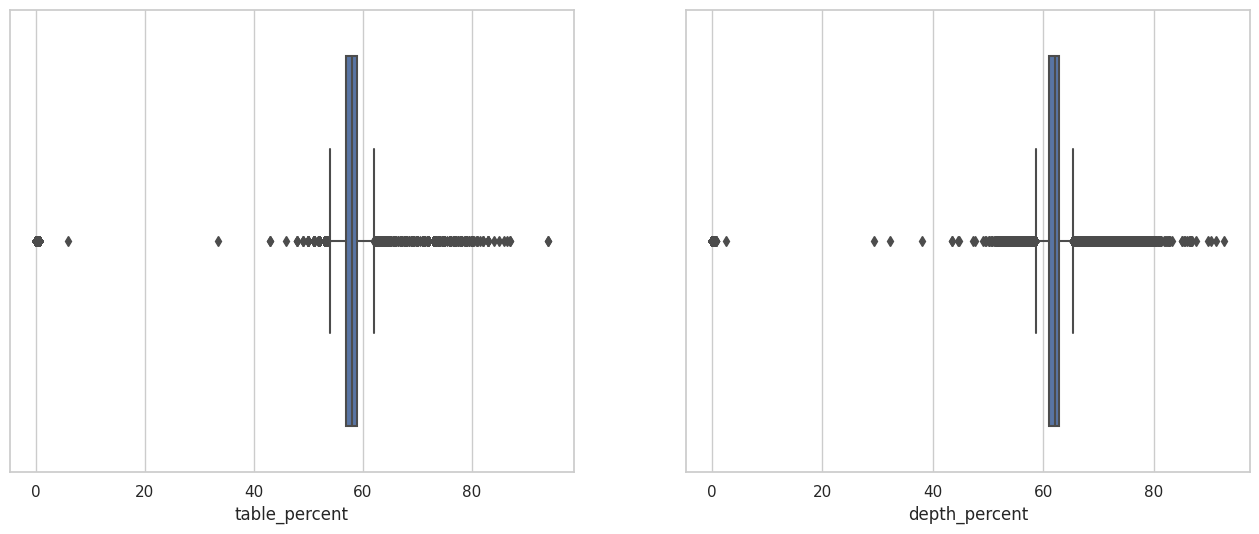

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["table_percent", "depth_percent"]):
    sns.boxplot(x=ddf[col], ax=ax[axid])

<Axes: xlabel='carat_weight'>

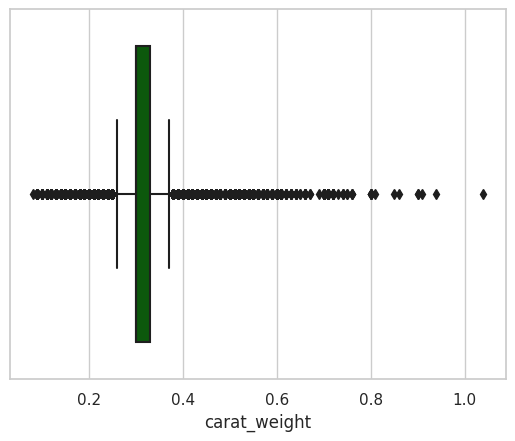

In [ ]:
sns.boxplot(x=ddf['carat_weight'], color="darkgreen")

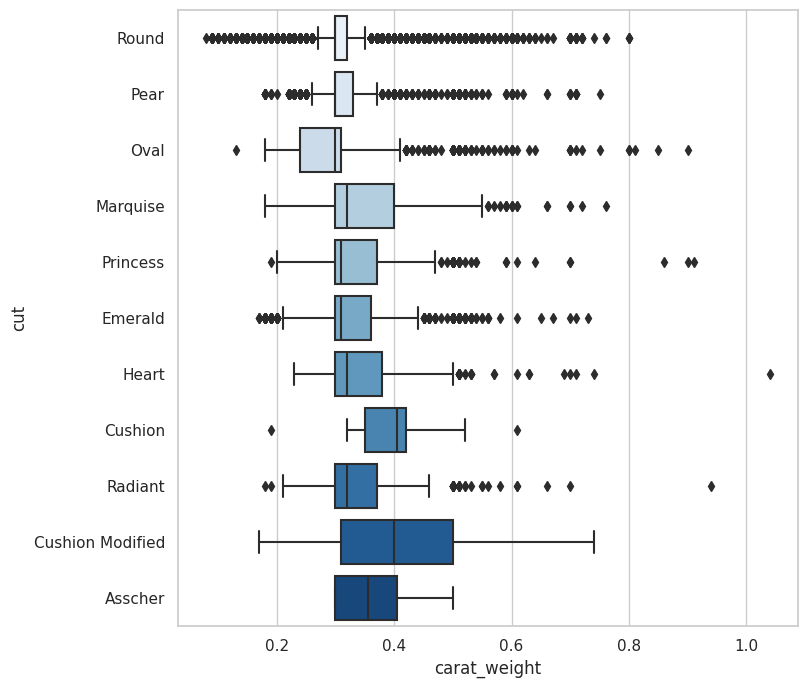

In [ ]:
plt.figure(figsize=(8, 8))
sns.boxplot(x=ddf['carat_weight'], y=df["cut"], palette="Blues")
plt.show()

### Category Distribution

<Axes: ylabel='color'>

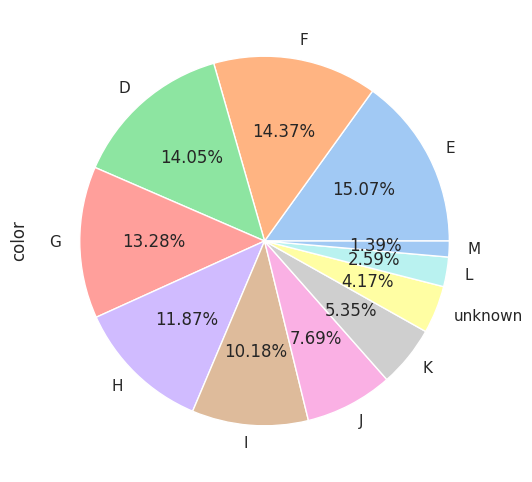

In [ ]:
piec_colors = sns.color_palette('pastel')[0:len(color_dist)]
plt.figure(figsize=(6,6))
color_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

<Axes: ylabel='cut'>

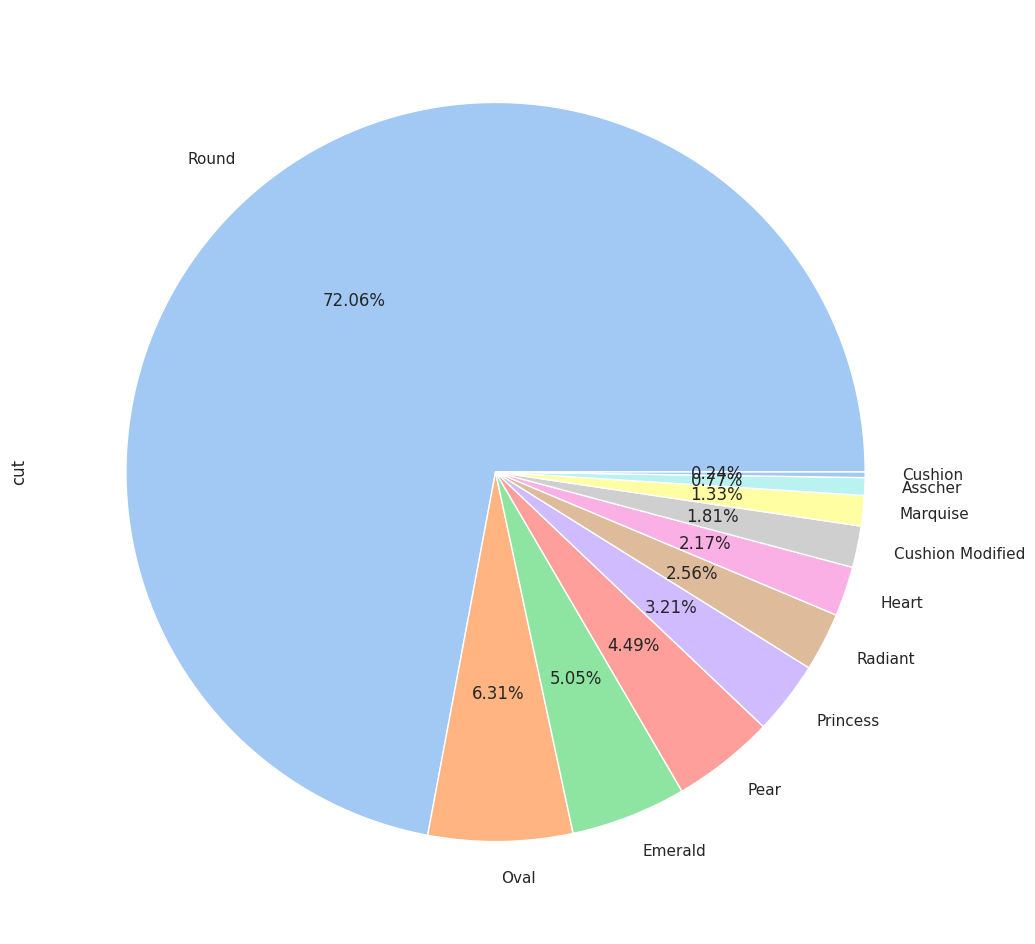

In [ ]:
piec_colors = sns.color_palette('pastel')[0:len(cut_dist)]
plt.figure(figsize=(12,12))
cut_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

<Axes: ylabel='clarity'>

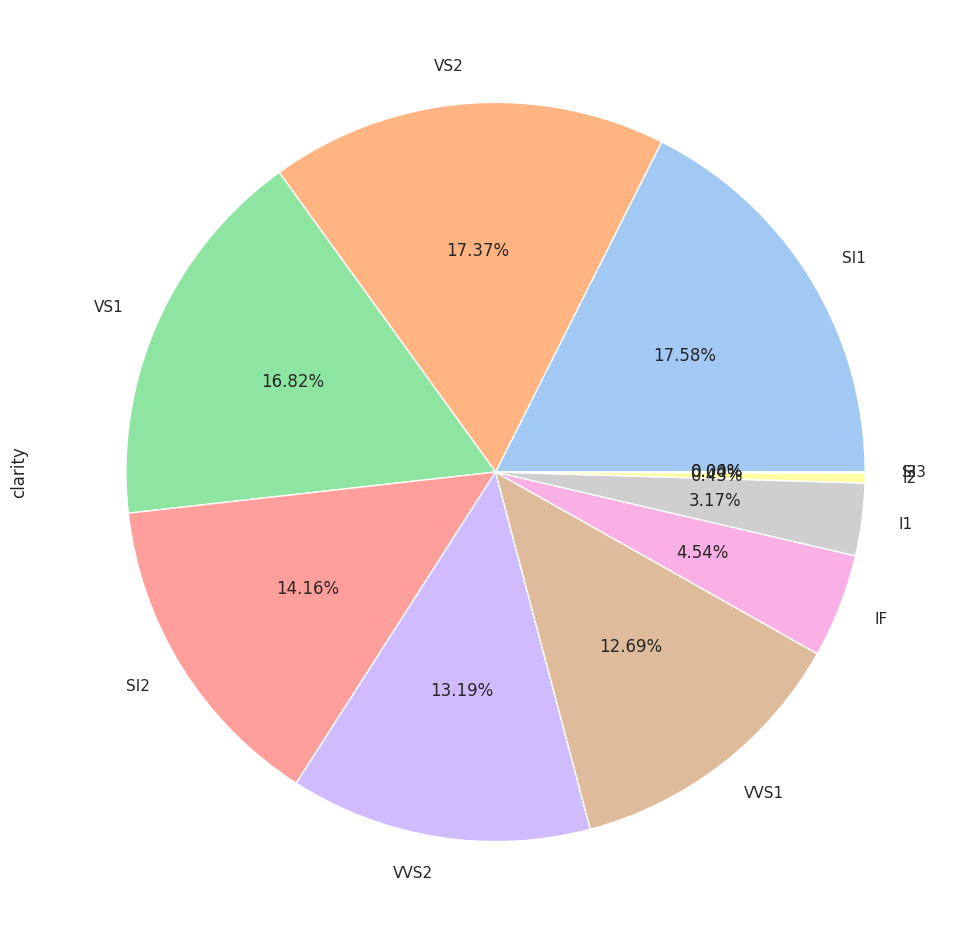

In [ ]:
piec_colors = sns.color_palette('pastel')[0:len(clarity_dist)]
plt.figure(figsize=(12,12))
clarity_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

<Axes: ylabel='eye_clean'>

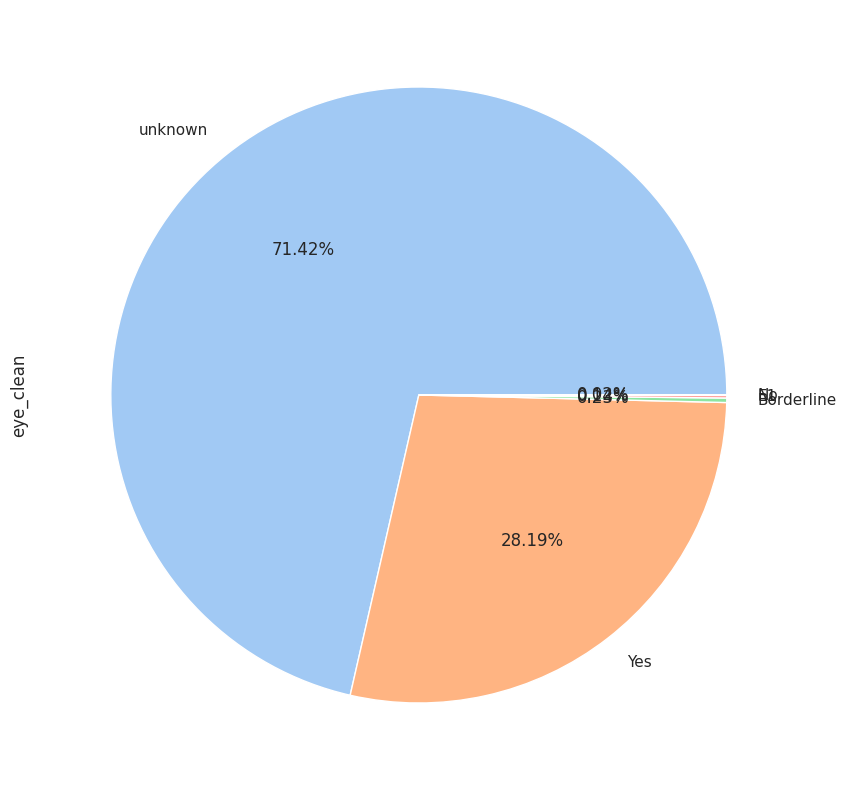

In [ ]:
piec_colors = sns.color_palette('pastel')[0:len(eye_clean_dist)]
plt.figure(figsize=(10,10))
eye_clean_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

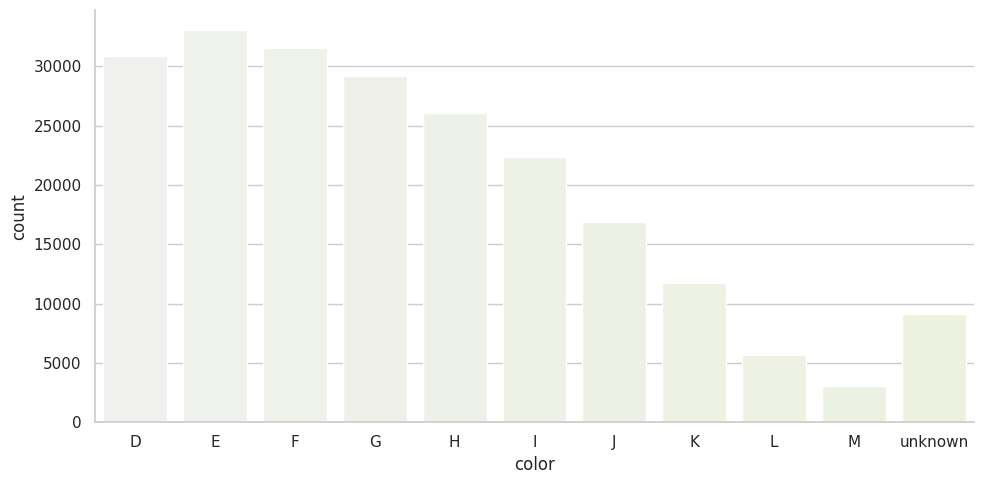

In [ ]:
sns.set_palette(palette="light:#edf5dc", n_colors=11)
colors = ['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'unknown']
sns.catplot(x='color', data=df, kind='count', order=colors, aspect=2.0)

We could observe from the above column chart that color value 'E' has the highest occurence in the dataset

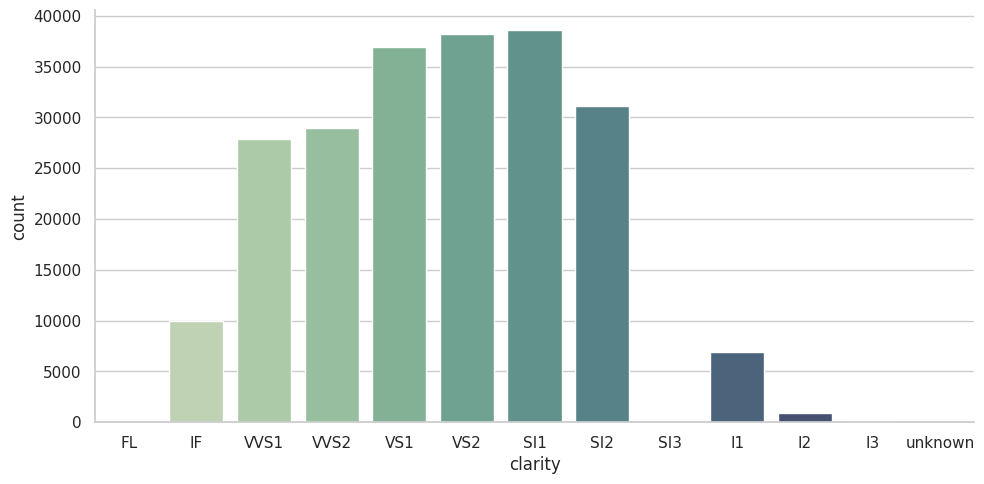

In [ ]:
sns.set_palette(palette="ch:s=.55,rot=-.75", n_colors=14)

clarities = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'SI3', 'I1', 'I2', 'I3', 'unknown']
sns.catplot(x='clarity', data=df, kind='count', order=clarities, aspect=2.0)

We could observe from the above column chart that clarity value 'SI1' has the highest occurence in the dataset

### Feature Selection and Data Cleaning

In [ ]:
color_dist = ddf["color"].value_counts()
color_dist / len(ddf)

E         0.1507
F         0.1437
D         0.1405
G         0.1328
H         0.1187
I         0.1018
J         0.0769
K         0.0535
unknown   0.0417
L         0.0259
M         0.0139
Name: color, dtype: float64

In [ ]:
# since approx 4% of color column is 'unknown', we can replace those values with mode
ddf["color"].replace('unknown', ddf["color"].mode()[0], inplace=True)

In [ ]:
cut_dist = ddf["cut"].value_counts()
cut_dist / len(ddf)

Round              0.7206
Oval               0.0631
Emerald            0.0505
Pear               0.0449
Princess           0.0321
Radiant            0.0256
Heart              0.0217
Cushion Modified   0.0181
Marquise           0.0133
Asscher            0.0077
Cushion            0.0024
Name: cut, dtype: float64

In [ ]:
clarity_dist = ddf["clarity"].value_counts()
clarity_dist / len(ddf)

SI1    0.1758
VS2    0.1737
VS1    0.1682
SI2    0.1416
VVS2   0.1319
VVS1   0.1269
IF     0.0454
I1     0.0317
I2     0.0043
I3     0.0004
SI3    0.0000
Name: clarity, dtype: float64

In [ ]:
eye_clean_dist = ddf["eye_clean"].value_counts()
eye_clean_dist / len(ddf)

unknown      0.7142
Yes          0.2819
Borderline   0.0023
E1           0.0014
No           0.0002
Name: eye_clean, dtype: float64

In [ ]:
culet_dist = ddf["culet_size"].value_counts()
culet_dist / len(ddf)

N         0.6004
unknown   0.3903
VS        0.0061
S         0.0022
M         0.0007
L         0.0003
SL        0.0001
EL        0.0000
VL        0.0000
Name: culet_size, dtype: float64

In [ ]:
ddf["culet_size"].mode()

0    N
Name: culet_size, dtype: object

In [ ]:
# since approx 39% of culet_size column is 'unknown', we can replace those values with mode
ddf["culet_size"].replace('unknown', 'N', inplace=True)

In [ ]:
fluor_color_dist = ddf["fluor_color"].value_counts()
fluor_color_dist / len(ddf)

unknown   0.9284
Blue      0.0693
Yellow    0.0018
Green     0.0003
White     0.0002
Orange    0.0000
Name: fluor_color, dtype: float64

In [ ]:
fluor_intensity_dist = ddf["fluor_intensity"].value_counts()
fluor_intensity_dist / len(ddf)

None          0.6531
Faint         0.1743
Medium        0.0942
Strong        0.0603
Very Slight   0.0124
Very Strong   0.0050
unknown       0.0006
Slight        0.0001
Name: fluor_intensity, dtype: float64

In [ ]:
fancy_color_dominant_color_dist = ddf["fancy_color_dominant_color"].value_counts()
fancy_color_dominant_color_dist / len(ddf)

unknown     0.9583
Yellow      0.0295
Pink        0.0062
Brown       0.0024
Green       0.0014
Orange      0.0012
Purple      0.0003
Gray        0.0003
Blue        0.0002
Chameleon   0.0001
Black       0.0000
Red         0.0000
Other       0.0000
Name: fancy_color_dominant_color, dtype: float64

In [ ]:
fancy_color_secondary_color_dist = ddf["fancy_color_secondary_color"].value_counts()
fancy_color_secondary_color_dist / len(ddf)

unknown   0.9952
Brown     0.0014
Yellow    0.0011
Orange    0.0007
Pink      0.0006
Green     0.0005
Purple    0.0004
Gray      0.0002
Blue      0.0001
Violet    0.0000
Red       0.0000
Name: fancy_color_secondary_color, dtype: float64

In [ ]:
fancy_color_overtone_dist = ddf["fancy_color_overtone"].value_counts()
fancy_color_overtone_dist / len(ddf)

unknown     0.9907
None        0.0075
Brownish    0.0006
Yellowish   0.0004
Orangey     0.0002
Pinkish     0.0002
Greenish    0.0002
Purplish    0.0002
Grayish     0.0000
Name: fancy_color_overtone, dtype: float64

In [ ]:
fancy_color_intensity_dist = ddf["fancy_color_intensity"].value_counts()
fancy_color_intensity_dist / len(ddf)

unknown         0.9583
Fancy           0.0157
Fancy Intense   0.0088
Fancy Light     0.0059
Fancy Deep      0.0035
Fancy Vivid     0.0032
Light           0.0014
Faint           0.0011
Fancy Dark      0.0011
Very Light      0.0009
Name: fancy_color_intensity, dtype: float64

#### Based on the value counts, we can see that majority of columns:
["***fluor_color***", "***fluor_intensity***",\
"***fancy_color_dominant_color***", "***fancy_color_secondary_color***", \
"***fancy_color_overtone***", "***fancy_color_intensity***", "***eye_clean***"] \
have 'unknown' value. Hence we can drop those columns

In [ ]:
ddf.drop(columns= ["fluor_color", "fluor_intensity", "fancy_color_dominant_color", "fancy_color_secondary_color", "fancy_color_overtone", "fancy_color_intensity", "eye_clean"], inplace=True)

In [ ]:
ddf.columns

Index(['cut', 'color', 'clarity', 'carat_weight', 'cut_quality', 'lab',
       'symmetry', 'polish', 'culet_size', 'culet_condition', 'depth_percent',
       'table_percent', 'meas_length', 'meas_width', 'meas_depth',
       'girdle_min', 'girdle_max', 'total_sales_price'],
      dtype='object')

In [ ]:
ddf.shape

(219703, 18)

In [ ]:
cut_quality_dist = ddf["cut_quality"].value_counts()
cut_quality_dist / len(ddf)

Excellent   0.5683
unknown     0.2759
Very Good   0.1557
Good        0.0001
Fair        0.0000
Ideal       0.0000
Name: cut_quality, dtype: float64

In [ ]:
# since approx 27% of cut_quality column is 'unknown', we can replace those values with mode
ddf["cut_quality"].replace('unknown', ddf["cut_quality"].mode()[0], inplace=True)

In [ ]:
lab_dist = ddf["lab"].value_counts()
lab_dist / len(ddf)

GIA   0.9123
IGI   0.0722
HRD   0.0155
Name: lab, dtype: float64

In [ ]:
polish_dist = ddf["polish"].value_counts()
polish_dist / len(ddf)

Excellent   0.8002
Very Good   0.1926
Good        0.0071
Fair        0.0000
Poor        0.0000
Name: polish, dtype: float64

In [ ]:
culet_condition_dist = ddf["culet_condition"].value_counts()
culet_condition_dist / len(ddf)

unknown   0.9303
Pointed   0.0696
Chipped   0.0001
Abraded   0.0000
Name: culet_condition, dtype: float64

In [ ]:
# since culet_condition column has majority of 'unknown' values, we can drop it
ddf.drop(columns= ["culet_condition"], inplace=True)

In [ ]:
for feature in ['depth_percent','table_percent', 'meas_length', 'meas_width', 'meas_depth','girdle_min', 'girdle_max']:
  print(f"'unknown' values for {feature} = ",(ddf[feature] == 'unknown').sum())

'unknown' values for depth_percent =  0
'unknown' values for table_percent =  0
'unknown' values for meas_length =  0
'unknown' values for meas_width =  0
'unknown' values for meas_depth =  0
'unknown' values for girdle_min =  83432
'unknown' values for girdle_max =  84295


In [ ]:
girdle_min_dist = ddf["girdle_min"].value_counts()
girdle_min_dist / len(ddf)

unknown   0.3797
M         0.3387
STK       0.1199
TN        0.0762
TK        0.0471
VTK       0.0204
XTK       0.0090
VTN       0.0075
XTN       0.0013
STN       0.0001
Name: girdle_min, dtype: float64

In [ ]:
# since approx 37% of girdle_min column is 'unknown', we can replace those values with mode
ddf["girdle_min"].replace('unknown', ddf["girdle_min"].mode()[0], inplace=True)

In [ ]:
girdle_max_dist = ddf["girdle_max"].value_counts()
girdle_max_dist / len(ddf)

unknown   0.3837
STK       0.3206
TK        0.1146
M         0.0818
VTK       0.0575
XTK       0.0348
TN        0.0062
VTN       0.0005
XTN       0.0002
STN       0.0001
Name: girdle_max, dtype: float64

In [ ]:
# since approx 38% of girdle_min column is 'unknown', we can replace those values with mode
ddf["girdle_max"].replace('unknown', ddf["girdle_max"].mode()[0], inplace=True)

In [ ]:
ddf.columns

Index(['cut', 'color', 'clarity', 'carat_weight', 'cut_quality', 'lab',
       'symmetry', 'polish', 'culet_size', 'depth_percent', 'table_percent',
       'meas_length', 'meas_width', 'meas_depth', 'girdle_min', 'girdle_max',
       'total_sales_price'],
      dtype='object')

### Correlation

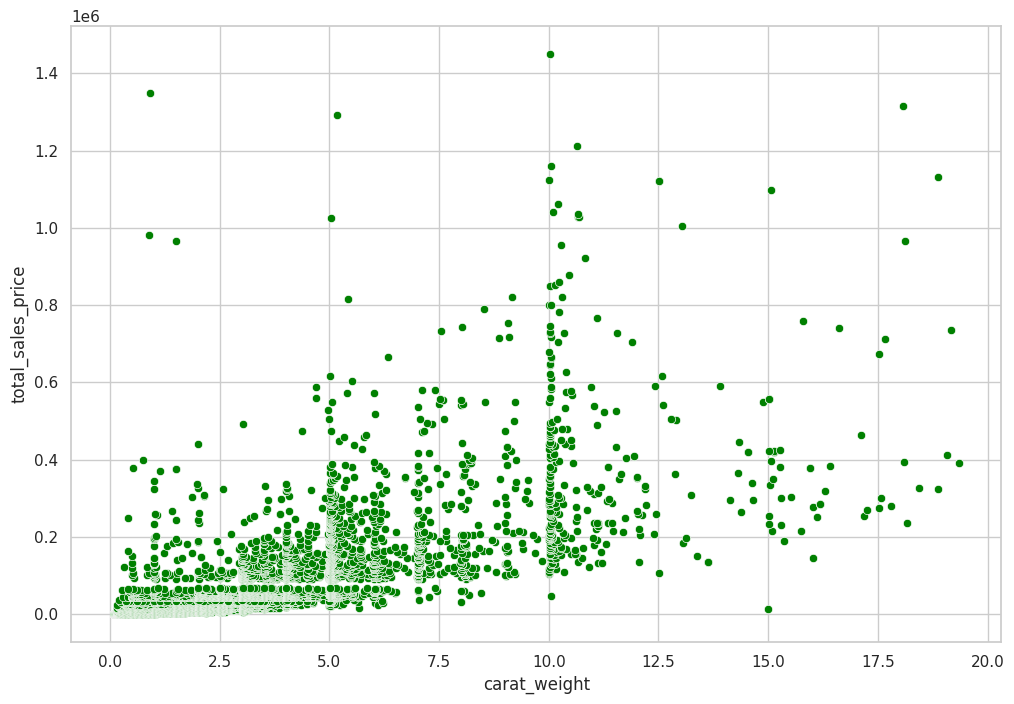

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=ddf["carat_weight"], y=ddf["total_sales_price"], color='green')
plt.show()

In [ ]:
#correlation matrix
corr = ddf.corr(method='pearson')
corr.style.background_gradient(cmap ='coolwarm')

<ipython-input-147-1c5bcc046472>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = ddf.corr(method='pearson')


,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
carat_weight,1.000000,0.061724,0.090697,0.782683,0.788912,0.350719,0.745963
depth_percent,0.061724,1.000000,0.673835,0.128791,0.119692,0.086477,0.025408
table_percent,0.090697,0.673835,1.000000,0.165742,0.141250,0.082533,0.045192
meas_length,0.782683,0.128791,0.165742,1.000000,0.788652,0.342209,0.489218
meas_width,0.788912,0.119692,0.141250,0.788652,1.000000,0.412933,0.506403
meas_depth,0.350719,0.086477,0.082533,0.342209,0.412933,1.000000,0.216410
total_sales_price,0.745963,0.025408,0.045192,0.489218,0.506403,0.216410,1.000000


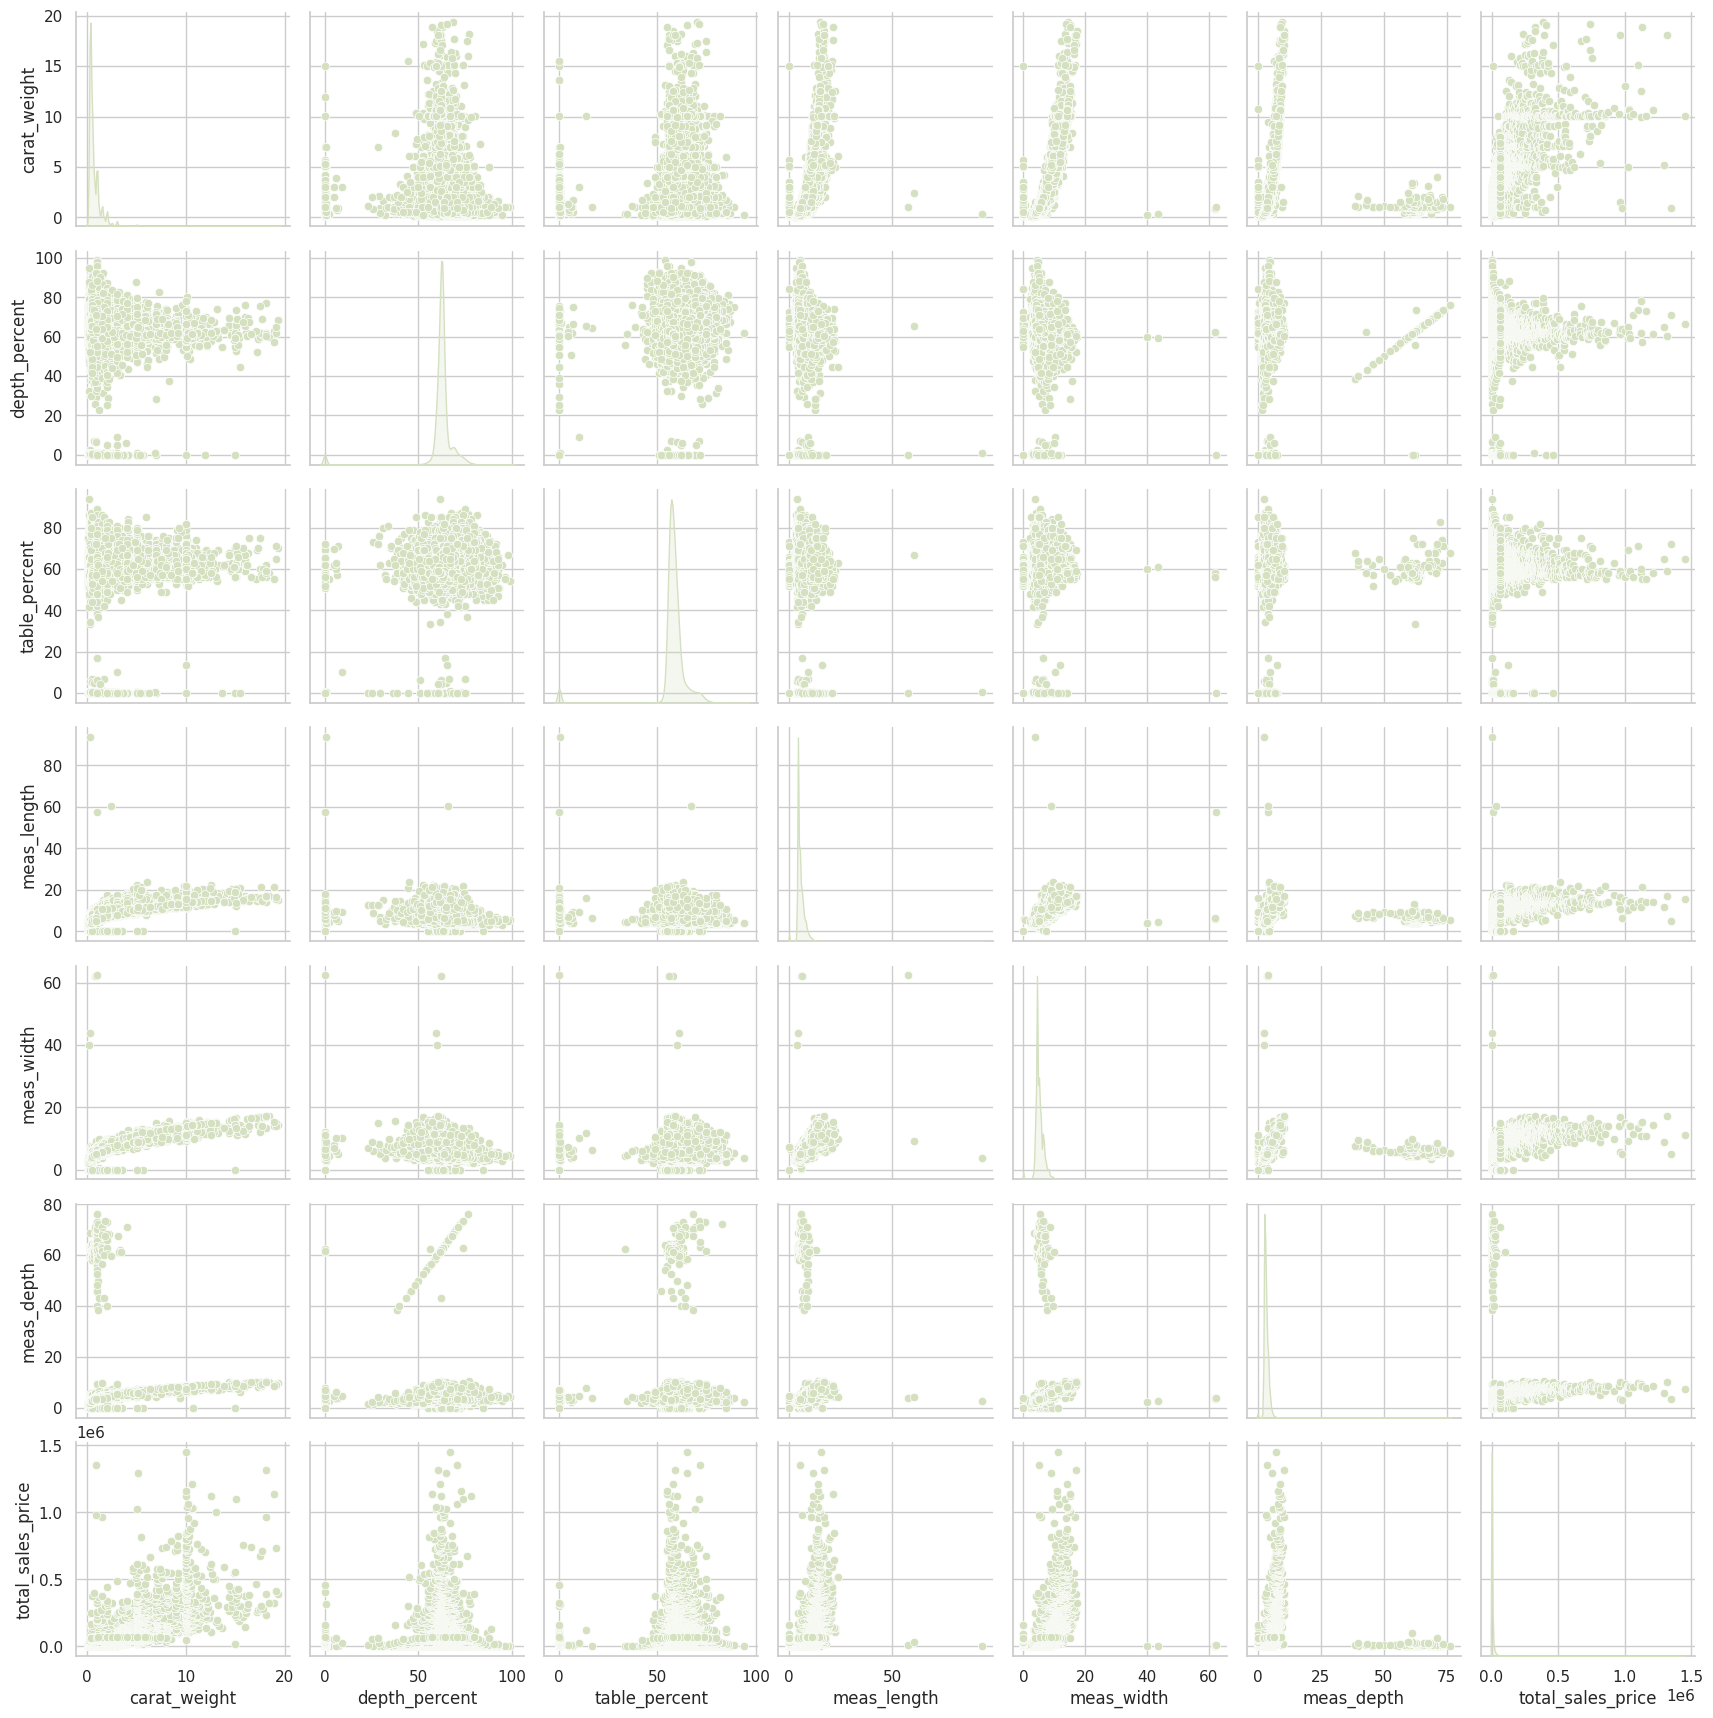

In [ ]:
#pairplots to get an intuition of potential correlations
sns.pairplot(ddf[["carat_weight","depth_percent","table_percent","meas_length","meas_width","meas_depth","total_sales_price"]], diag_kind="kde")

### Data Preprocessing

## Label Encoding
Here all the ordinal attributes containing columns will be encoded using label encoding as the hierarchy of the various types of attributes can affect the final prediction results for our dependent attribute.

Note that we have not used the library function of Label_Encoder as it will map the first occurence of various ordinal attributes for that column to unique numbers and the hierarchy of the corresponding numbers might not be same as that of various values of that attribute for that column

In [ ]:
label_mapping_clarity = {"I3": 0, "I2": 1, "I1": 2,"SI3":3,"SI2":4,"SI1":5,"VS2":6,"VS1":7,"VVS2":8,"VVS1":9,"IF":10}
ddf = ddf.replace({"clarity": label_mapping_clarity})
label_mapping_cut_quality = {"Fair": 0, "Good": 1, "Very Good": 2,"Excellent":3,"Ideal":4}
ddf = ddf.replace({"cut_quality": label_mapping_cut_quality})
label_mapping_symmetry = {"Poor":0,"Fair": 1, "Good": 2, "Very Good": 3,"Excellent":4}
ddf = ddf.replace({"symmetry": label_mapping_symmetry})
label_mapping_polish = {"Poor":0,"Fair": 1, "Good": 2, "Very Good": 3,"Excellent":4}
ddf = ddf.replace({"polish": label_mapping_polish})
label_mapping_fluor_intensity = {"None":0,"Faint": 1, "Very Slight": 2, "Slight": 3,"Medium":4,"Strong":5,"Very Strong":6}
ddf = ddf.replace({"fluor_intensity": label_mapping_fluor_intensity})
label_mapping_cut = {"Round":0,"Oval": 1, "Emerald": 2, "Pear": 3,"Princess":4,"Radiant":5,"Heart":6,"Cushion Modified":7,"Marquise":8,"Asscher":9,"Cushion":10}
ddf = ddf.replace({"cut": label_mapping_cut})
label_mapping_color = {"E":0,"F": 1, "D": 2, "G": 3,"H":4,"I":5,"J":6,"K":7,"L":8,"M":9}
ddf = ddf.replace({"color": label_mapping_color})
label_mapping_lab = {"GIA":0,"IGI": 1, "HRD": 2}
ddf = ddf.replace({"lab": label_mapping_lab})

ddf.sample(10)


,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,culet_size,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
102,0,5,7,0.1300,2,1,3,3,N,58.4000,64.0000,3.3700,3.4100,1.9800,TN,TN,270
135899,2,2,7,0.5000,3,0,3,4,N,70.4000,69.0000,5.2400,3.8300,2.7000,VTK,VTK,3240
27407,3,0,7,0.2500,3,0,3,3,N,59.5000,57.0000,5.3400,3.5700,2.1300,unknown,unknown,782
85524,0,1,10,0.3000,3,0,4,4,N,62.8000,55.0000,4.2600,4.2800,2.6800,unknown,unknown,1280
153180,0,0,6,0.6000,3,0,4,4,N,62.0000,59.0000,5.3600,5.3800,3.3300,unknown,unknown,3890
149328,1,8,4,1.2900,3,0,3,4,N,60.2000,60.0000,9.1700,5.9800,3.6100,M,STK,3799
30700,0,5,7,0.3000,3,0,3,3,N,59.8000,60.0000,4.3400,4.3700,2.6000,M,STK,792
133381,0,0,7,0.5000,3,0,4,4,N,62.5000,59.0000,5.0300,5.0700,3.1600,M,STK,3102
139544,0,0,6,0.5400,3,0,4,4,N,62.6000,57.0000,5.1700,5.2000,3.2500,M,STK,3300
185653,0,0,7,1.0000,2,0,3,4,N,61.3000,64.0000,6.3500,6.3800,3.9000,TK,TK,8882


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Encode categorical columns using LabelEncoder
categorical_columns = ['culet_size', 'girdle_min', 'girdle_max']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    ddf[col] = le.fit_transform(ddf[col])
    label_encoders[col] = le

In [ ]:
# Split the dataset into predictor (X) and target (y) features
X = ddf.drop('total_sales_price', axis=1)
y = ddf['total_sales_price']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model Building

In [ ]:
# Create and train a Decision Tree Regression model
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

### Hyperparameter Tuning:

In [ ]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

In [ ]:
# Create a Decision Tree Regression model with the best hyperparameters
best_dt_regressor = DecisionTreeRegressor(random_state=42, **best_params)
best_dt_regressor.fit(X_train, y_train)

### Model Evaluation

In [ ]:
# Predict on the test set
y_pred = best_dt_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

#### Decision Tree Visualization

In [ ]:
from sklearn.tree import plot_tree
plot_tree(best_dt_regressor, filled=True, feature_names=X.columns)